# Life Expectancy GDP


# Introduction
This project will investigate the relationship between a country's GDP and its citizens' life expectancy.

**Goal**
To prepare the data and analyse it with plots to explain my findings.

**Questions the project will seek to answer**

-Is there a correlation between GDP and life expectancy of a country? 

-Has life expectancy increased over time in the six countries? 

-Has GDP increased over time in the six countries? 

-What is the average life expectancy in these nations? 

-What is the distribution of that life expectancy? 

-Are there countries with low GDP and high life expectancy and vice versa? 

-Which countries deviate from the expected relationship between GDP and life expectancy? 

**Data source**
The data used is from the World Health Organization and the World Bank


### Import Python Modules

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


### Load the Data

In [8]:
all_data = pd.read_csv("all_data.csv")
print(all_data.head())
#summary statistics

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


### Explore the Data

In [10]:
countries = all_data['Country'].unique()
print(countries)

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [14]:
year = all_data['Year'].unique()
print(year)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [16]:
#change column name for ease
all_data = all_data.rename(columns={'Life expectancy at birth (years)': 'life expectancy'})
print(all_data)

     Country  Year  life expectancy           GDP
0      Chile  2000             77.3  7.786093e+10
1      Chile  2001             77.3  7.097992e+10
2      Chile  2002             77.8  6.973681e+10
3      Chile  2003             77.9  7.564346e+10
4      Chile  2004             78.0  9.921039e+10
..       ...   ...              ...           ...
91  Zimbabwe  2011             54.9  1.209845e+10
92  Zimbabwe  2012             56.6  1.424249e+10
93  Zimbabwe  2013             58.0  1.545177e+10
94  Zimbabwe  2014             59.2  1.589105e+10
95  Zimbabwe  2015             60.7  1.630467e+10

[96 rows x 4 columns]


In [18]:
#it's over a course of 15 years

#avg GDP across countries
avg_GDP = all_data['GDP'].mean()
print("The average GDP across countries is " + str(avg_GDP))
#avg Life expectancy across countries
avg_life_expectancy = round(all_data['life expectancy'].mean(), 2)
print("The average life expectancy across countries is " + str(avg_life_expectancy))
#max and min GDP
max_GDP = all_data['GDP'].max()
print("The maximum GDP across countries is " + str(max_GDP))
min_GDP = all_data['GDP'].min()
print("The minimum GDP across countries is " + str(min_GDP))
#max and min life expectancy
max_life_expectancy = all_data['life expectancy'].max()
print("The maximum life expectancy across all countries is " + str(max_life_expectancy))
min_life_expectancy = all_data['life expectancy'].min()
print("The minimum life expectancy across all countries is " + str(min_life_expectancy))


The average GDP across countries is 3880498570768.396
The average life expectancy across countries is 72.79
The maximum GDP across countries is 18100000000000.0
The minimum GDP across countries is 4415702800.0
The maximum life expectancy across all countries is 81.0
The minimum life expectancy across all countries is 44.3


**Distribution**

-Displot is a function in the seaborn library used to visualize the distribution of a dataset. It stands for “distribution plot” and can create histograms, kernel density plots, or both. It’s useful for understanding the shape, spread, and central tendency of data.


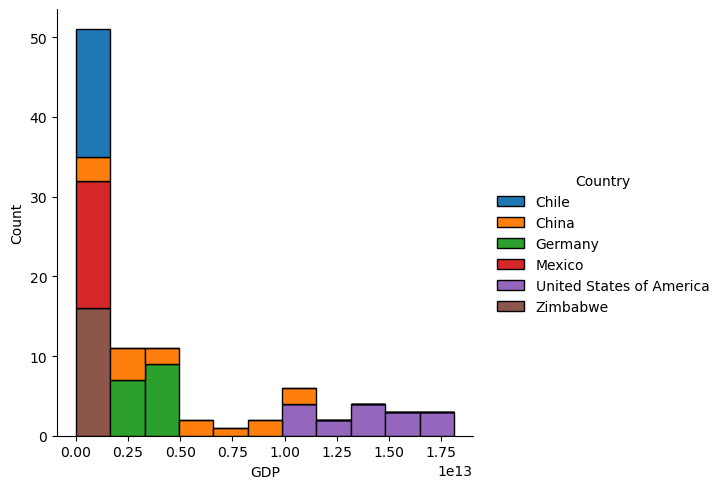

<Figure size 640x480 with 0 Axes>

In [63]:
#Distribution of GDP
sns.displot
sns.displot(all_data, x='GDP', hue='Country', alpha=1, multiple="stack") #used stack and alpha to avoid blending in of the colours on the plot.
plt.show()
plt.clf()



The plot shows that a significant proportion of the data points are concentrated in the lower GDP range, particularly for countries like Zimbabwe and Chile, compared to the United States and China, which have much higher GDPs. This suggests a noticeable disparity in GDP distribution among the countries. Additionally, the distribution appears to be right-skewed, indicating that most countries have relatively low GDPs, with only a few outliers in the higher range.



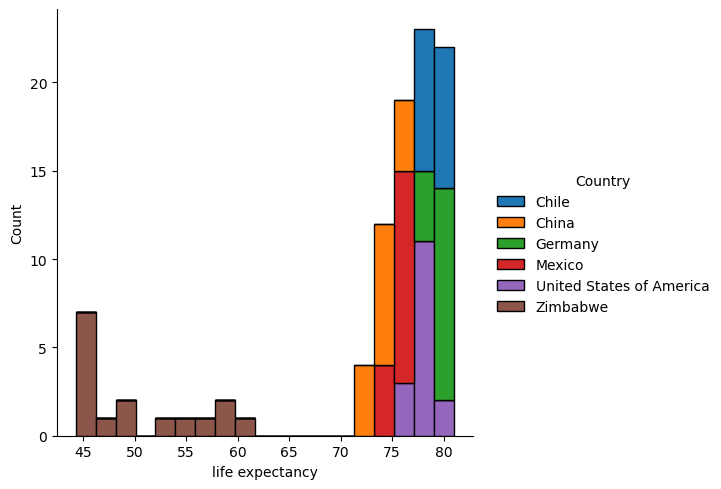

<Figure size 640x480 with 0 Axes>

In [66]:
#Distribution of Life expectancy
sns.displot
sns.displot(all_data, x='life expectancy', hue='Country', alpha=1, multiple="stack")
plt.show()
plt.clf()


-The plot shows that, in this dataset, the life expectancy values for most countries are distributed in the higher life expectancy range, except for Zimbabwe, which occupies the lower life expectancy range. The distribution appears to be left-skewed, as the majority of the data is concentrated in the higher range, with a long tail extending toward the lower range.



In [20]:
#Categorizing by mean to make plot
all_data_mean = all_data.drop("Year", axis = 1).groupby("Country").mean().reset_index()
print(all_data_mean)

                    Country  life expectancy           GDP
0                     Chile         78.94375  1.697888e+11
1                     China         74.26250  4.957714e+12
2                   Germany         79.65625  3.094776e+12
3                    Mexico         75.71875  9.766506e+11
4  United States of America         78.06250  1.407500e+13
5                  Zimbabwe         50.09375  9.062580e+09


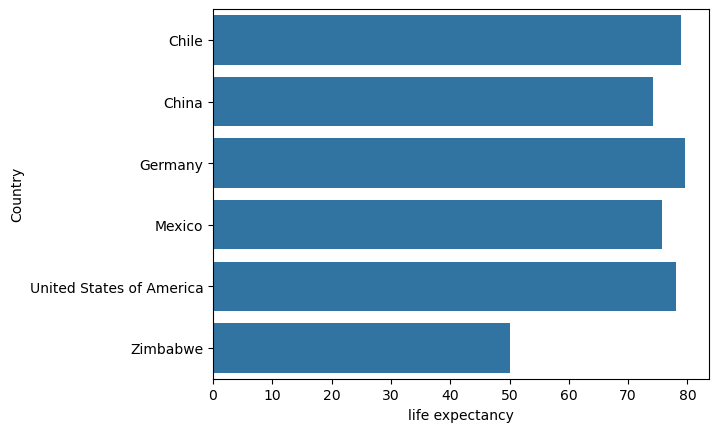

In [22]:
#Bar chart showing avg Life expectancy in each country
sns.barplot(x="life expectancy", y="Country", data=all_data_mean)
plt.show()


- This plot shows Germany, United States of America and Chile have high life expectancy, with China and Mexico following. It seems, Zimbabwe has the lowest life expectancy compared to the other countries.

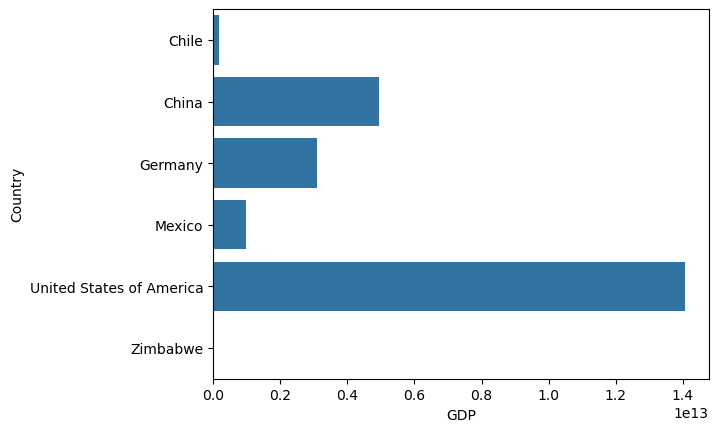

In [25]:
#Bar chart showing avg GDP in each country
sns.barplot(x="GDP", y="Country", data=all_data_mean)
plt.show()

-It seems, United States of America has the highest GDP compared to the other countries. In the plot Chile is barely visible while Zimbabwe is not visible,meaning it's most likely negative. China, Germany and Mexico have low values and seem to be reltatively close in figures. 

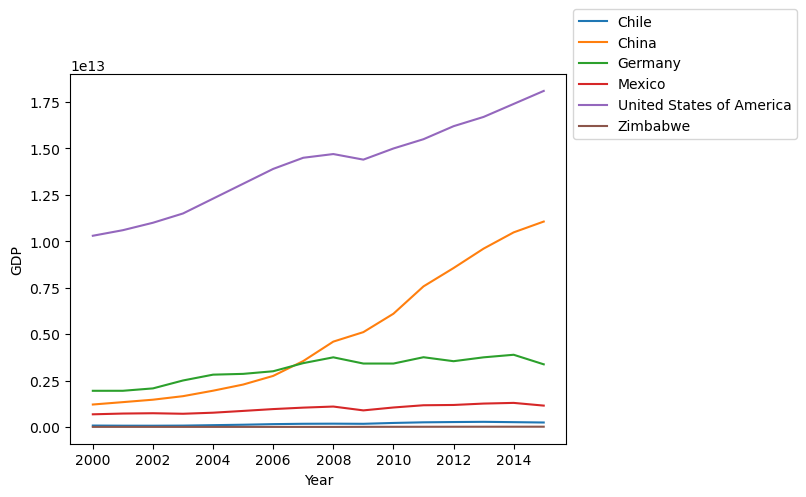

In [28]:
#Exploring GDP over the years using line charts
sns.lineplot(x=all_data.Year, y=all_data.GDP, hue=all_data.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 1))
plt.show()

-This plot shows a notable increase in GDP with time in the United States of America and China. However, the data does not clearly illustrate trends in other countries, as Zimbabwe and Chile appear to have experienced little to no change in GDP over time.

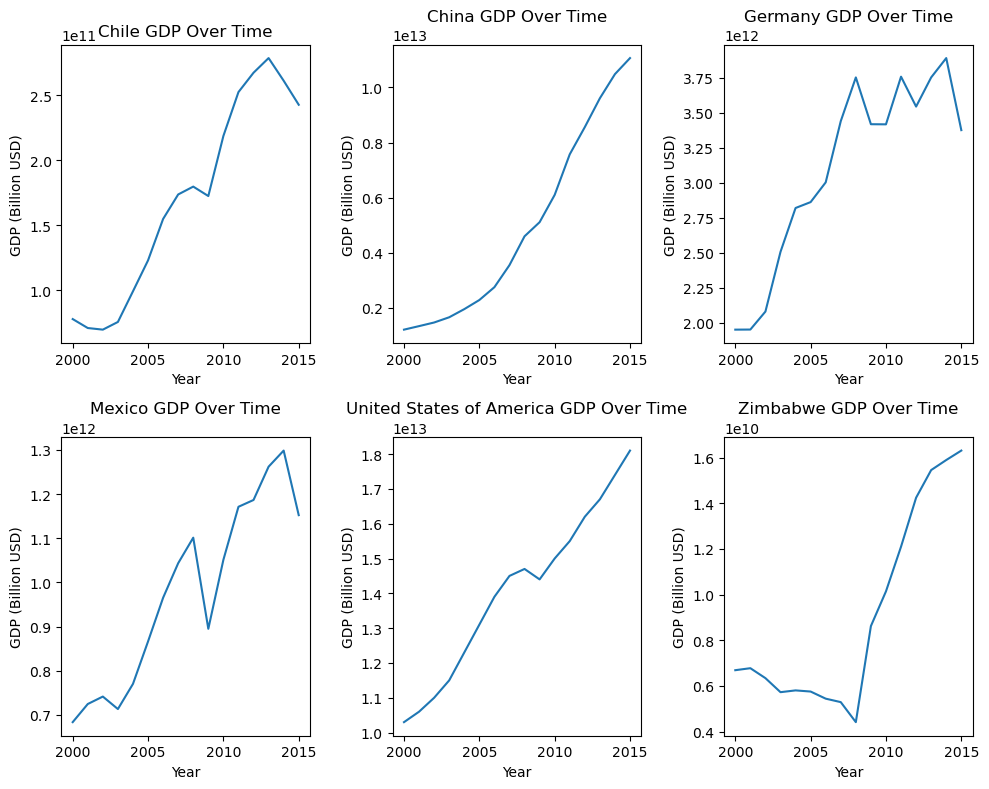

In [31]:
#using subplots for better analysis
plt.figure(figsize=(10, 8)) 

# Loop through the countries to create subplots
for i, country in enumerate(countries, start=1):
    plt.subplot(2, 3, i)
    
  # Filter the data for the current country
    country_data = all_data[all_data['Country'] == country]
    
    plt.plot(country_data['Year'], country_data['GDP'])
    plt.title(f'{country} GDP Over Time')
    plt.xlabel('Year')
    plt.ylabel('GDP (Billion USD)')


plt.tight_layout()
plt.show()


-The subplots express the trends in the countries more clearly. It seems to show all countires have had a generall increase in GDP over the 15 years. Howeevr, China, Mexico and Chile most recent year experienced a dip compared to the previous year one or two years.

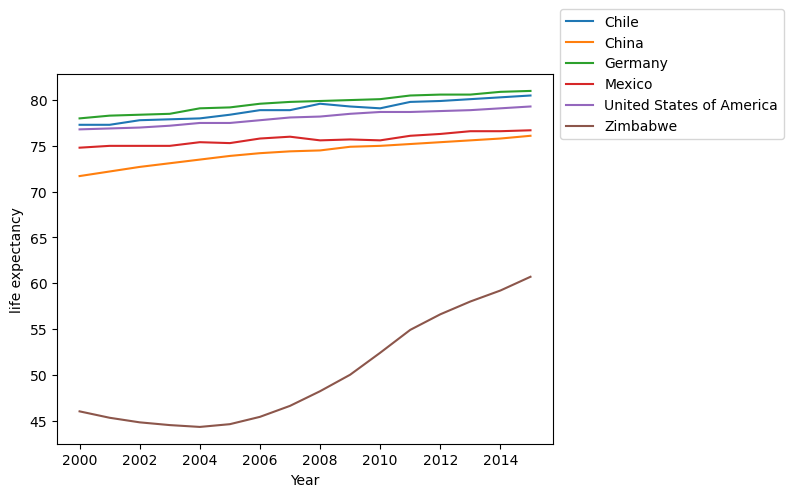

In [136]:
#Exploring life expectancy over the years using line charts
sns.lineplot(x=all_data.Year, y=all_data['life expectancy'], hue=all_data.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 1))
plt.show()

-The plot shows little increase in life expectancy over the years for all coutires except Zimbabwe which seems to have a huge increase in life expectancy.

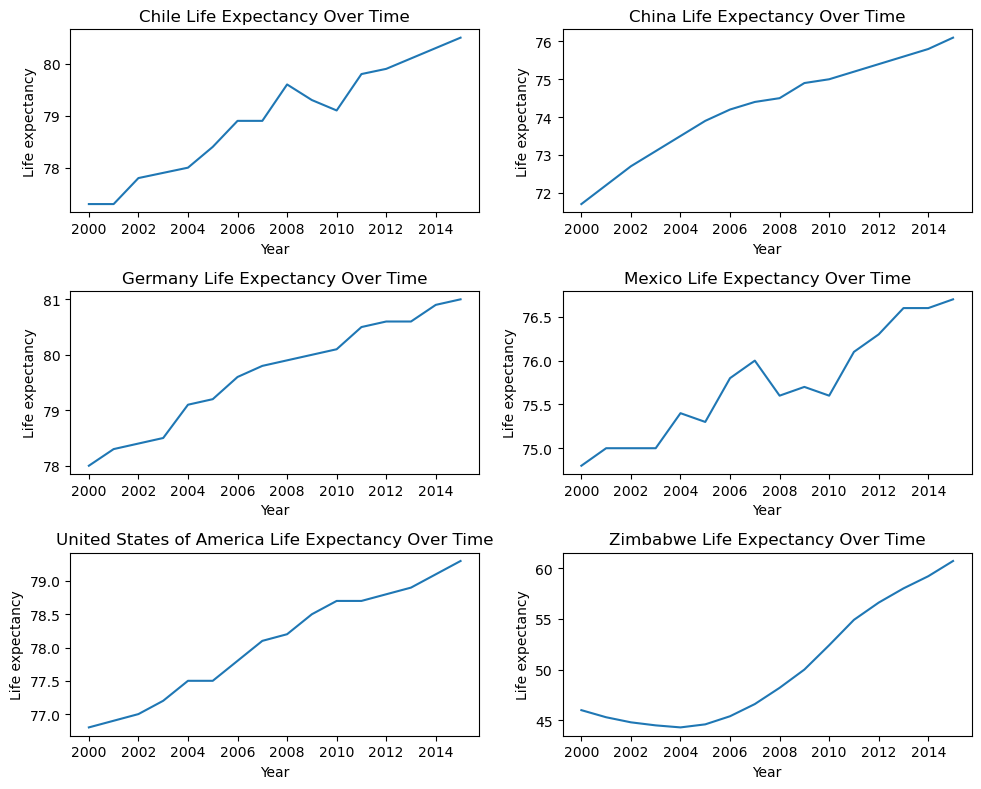

In [35]:
#using subplots for better analysis
plt.figure(figsize=(10, 8)) 

# Loop through the countries to create subplots
for i, country in enumerate(countries, start=1):
    plt.subplot(3, 2, i)
    
  # Filter the data for the current country
    country_data = all_data[all_data['Country'] == country]
    
    plt.plot(country_data['Year'], country_data['life expectancy'])
    plt.title(f'{country} Life Expectancy Over Time')
    plt.xlabel('Year')
    plt.ylabel('Life expectancy')


plt.tight_layout()
plt.show()


-The subplots show a general increase in life expectancy over the years for all countries

**Correlation**

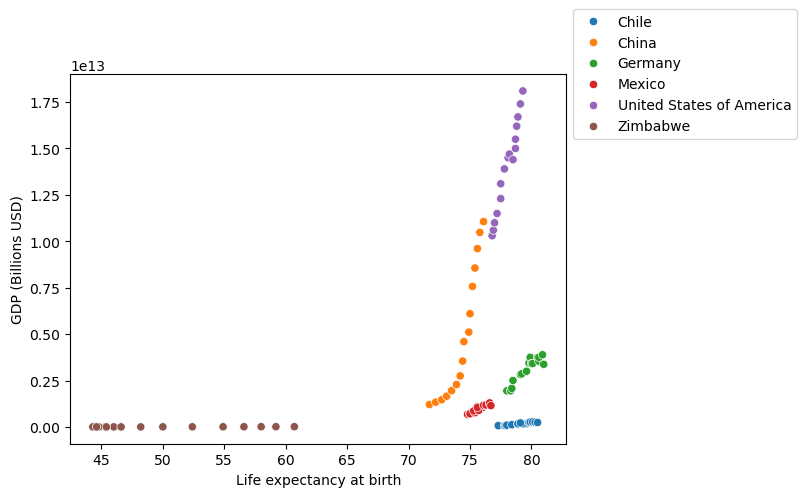

In [146]:
#Scatter plots
sns.scatterplot(x = all_data['life expectancy'], y = all_data['GDP'], hue=all_data['Country'])
plt.xlabel('Life expectancy at birth')
plt.ylabel('GDP (Billions USD)')
plt.legend(loc='center left', bbox_to_anchor=(1, 1))
plt.show()


-The scatter plot shows a positive linear relationship between GDP and Life expectancy for United Stated of America and China. It doesn't clearly show if there is a strong relationship in Germany, Mexico and Chile. And it looks like there is no relationship in Zimbabwe.

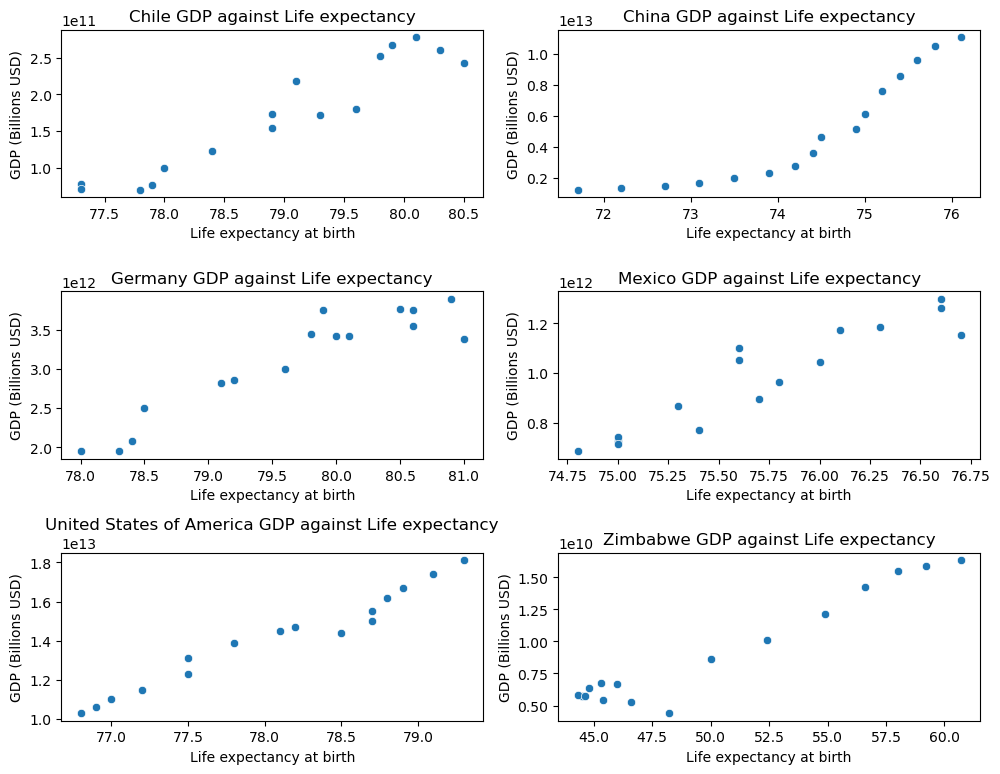

In [40]:
#using subplots for better analysis
plt.figure(figsize=(10, 8)) 

# Loop through the countries to create subplots
for i, country in enumerate(countries, start=1):
    plt.subplot(3, 2, i)
    
  # Filter the data for the current country
    country_data = all_data[all_data['Country'] == country]
    sns.scatterplot(x = country_data['life expectancy'], y = country_data['GDP'])
    plt.xlabel('Life expectancy at birth')
    plt.ylabel('GDP (Billions USD)')
    plt.title(f'{country} GDP against Life expectancy')
   

plt.tight_layout()
plt.show()


-The subplots give a better view into the relationship between GDP and life expectany in the countires. All the plots show a somewhat positive relationship.

In [42]:
#using covariance to determine strength
all_data_cov = np.cov(all_data['GDP'], all_data['life expectancy'])
print(all_data_cov)


[[2.70146436e+25 1.90386943e+13]
 [1.90386943e+13 1.13910417e+02]]


In [158]:
#pearson correlation
from scipy.stats import pearsonr
all_data_corr, p = pearsonr(all_data['GDP'], all_data['life expectancy'])
print(all_data_corr) 


0.34320674844915594


-Calculated pearson correlation which shows a weak positive correlation between GDP and Life expectancy for all six countries.

# Conclusion
**What did you learn throughout the process?**

-I learnt that based on the data used there is a weak psoitive correlation between GDP and Life expectancy in these countries.

**Are the results what you expected?**

-I suspected that there would be a positive correlation but weak because there are other factors that affect the life expectancy of citizens in a country other than its GDP.

**What are the key findings and takeaways?**

-Although over the 15 years Zimbabe had a low gdp compared to the other countries there was a general increase which could explain why it also had a surge/high increase in life expectancy over those years.
-Though there is evidence of a positive correlation, the bar charts highlighted Chile as having a high life expectancy but a low GDP. 

**In the future I hope to:**

-Find out if a predicitve model can accurately predict life expectancy based on GDP
-See what other factors carry more weight or have more influence on the life expectancy of citizens in a country.